In [1]:
import numpy as np
from scipy.linalg import qr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pennylane as qml
import cmath

In [2]:
# construct an unitary matrix
p = [3 * np.pi / 4, 2 * np.pi * 0.625, 2 * np.pi * 0.625, 2 * np.pi * 0.625] # 0.011, 0.101
p_exp = [np.exp(complex(0,i)) for i in p]
U = np.diag(p_exp)
pd.DataFrame(U.reshape(4,4))

,0,1,2,3
0,-0.707107+0.707107j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
1,0.000000+0.000000j,-0.707107-0.707107j,0.000000+0.000000j,0.000000+0.000000j
2,0.000000+0.000000j,0.000000+0.000000j,-0.707107-0.707107j,0.000000+0.000000j
3,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.707107-0.707107j


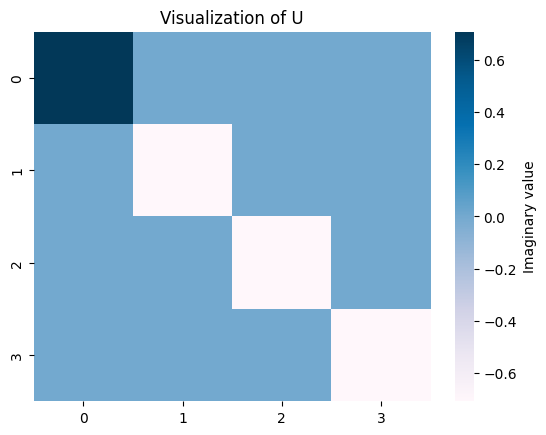

In [3]:
# adj matrix as a heatmap
sns.heatmap(pd.DataFrame(U.imag), cmap=plt.cm.PuBu, cbar_kws={'label': 'Imaginary value'})
plt.title('Visualization of U')
plt.show() # block diagonal ~ clusters

In [4]:
# Define matrix size (4×4) for eigenvalue multiplicities (1 and 3)
n = 4
p1 = 1j * 2 * np.pi * 0.2
p2 = 1j * 2 * np.pi * 0.625
eigenvalues = np.array([np.exp(p1),  # Multiplicity 1
                         np.exp(p2), np.exp(p2), np.exp(p2)])  # Multiplicity 3

# Generate a random unitary matrix using QR decomposition
Q, _ = qr(np.random.randn(n, n) + 1j * np.random.randn(n, n))

# Construct the unitary matrix via similarity transformation
U = Q @ np.diag(eigenvalues) @ Q.conj().T

def is_unitary(matrix): # unitarity check
    m_dagger = np.conjugate(matrix.transpose()) 
    identity = np.eye(matrix.shape[0])
    return np.allclose(np.dot(matrix, m_dagger), identity) 

is_unitary(U)

True

In [5]:
# Verify unitarity: U†U should be close to identity
print("U†U:\n", np.round(U.conj().T @ U, decimals=6))

# Print the unitary matrix
print("Unitary Matrix U:\n", np.round(U, decimals=4))

U†U:
 [[ 1.+0.j  0.+0.j  0.-0.j  0.-0.j]
 [ 0.-0.j  1.+0.j -0.-0.j -0.-0.j]
 [ 0.+0.j -0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.-0.j  1.+0.j]]
Unitary Matrix U:
 [[-0.6733-0.6519j  0.0955-0.1155j -0.0775-0.0501j -0.1332+0.2702j]
 [-0.1462+0.0327j -0.5259-0.4114j  0.1678-0.1321j -0.4918-0.4942j]
 [-0.0095-0.0918j -0.1939+0.0896j -0.6384-0.5949j  0.3377-0.2653j]
 [ 0.3013+0.004j  -0.2171-0.6625j -0.3897+0.1805j  0.0252+0.488j ]]


In [6]:
pd.DataFrame(U)

,0,1,2,3
0,-0.673270-0.651890j,0.095529-0.115465j,-0.077513-0.050129j,-0.133228+0.270220j
1,-0.146249+0.032697j,-0.525911-0.411422j,0.167844-0.132132j,-0.491754-0.494206j
2,-0.009475-0.091822j,-0.193930+0.089563j,-0.638356-0.594916j,0.337731-0.265258j
3,0.301252+0.003970j,-0.217090-0.662521j,-0.389674+0.180496j,0.025234+0.487964j


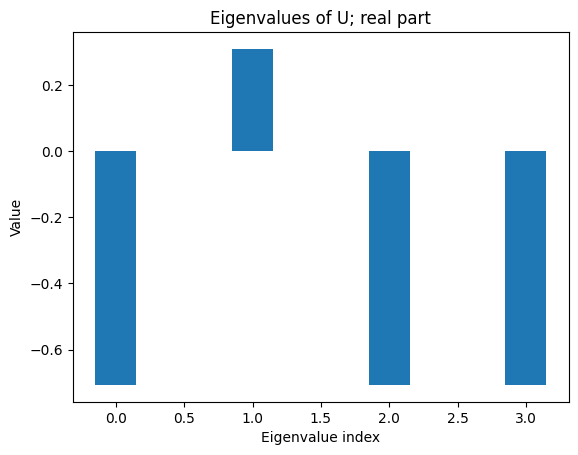

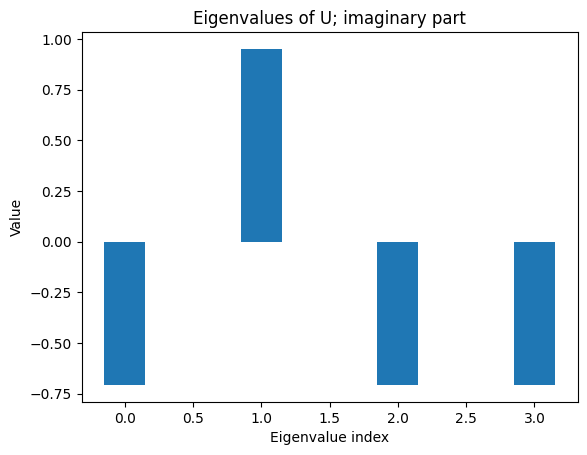

In [7]:
val, vec = np.linalg.eig(U)
plt.bar(range(len(val)), val.real, width=0.3)
plt.xlabel('Eigenvalue index')
plt.ylabel('Value')
plt.title('Eigenvalues of U; real part')
plt.show()

plt.bar(range(len(val)), val.imag, width=0.3)
plt.xlabel('Eigenvalue index')
plt.ylabel('Value')
plt.title('Eigenvalues of U; imaginary part')
plt.show()

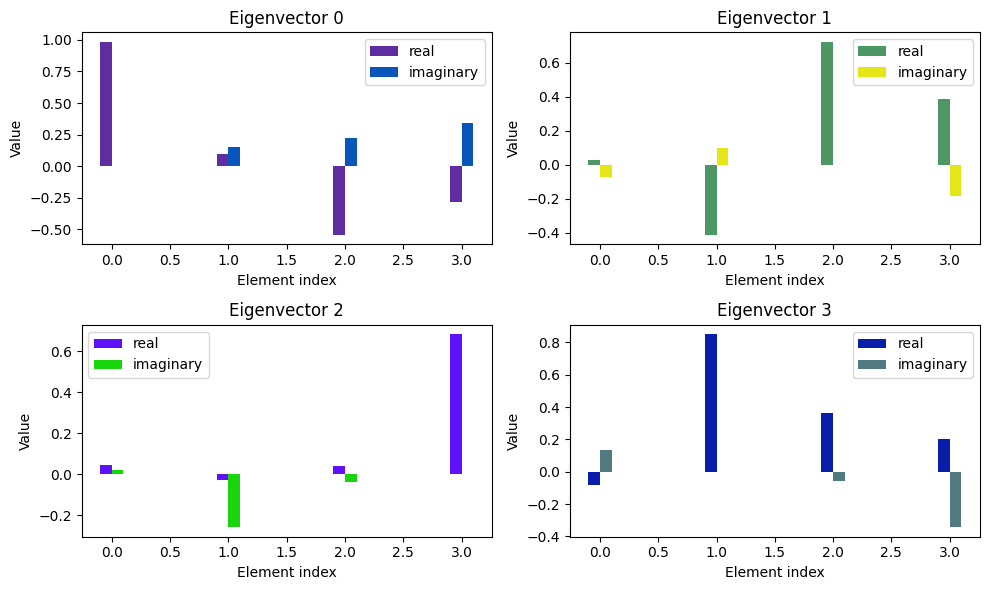

In [16]:
# random color generation
# colors
import random
random.seed(324)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(60)]

x = range(4)

# visualization of eigenvectors
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))  # 4 rows, 2 columns for 8 plots
axes = axes.flatten()  # Flatten the 2D array for easier indexing

# Loop through eigenvectors and plot each one
for i in range(4):
    axes[i].bar([i-0.05 for i in x], vec[i].real, color=colors[2*i], width=0.1, label='real')
    axes[i].bar([i+0.05 for i in x], vec[i].imag, color=colors[2*i+1], width=0.1, label='imaginary')
    axes[i].set_xlabel('Element index')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Eigenvector {i}')
    axes[i].legend(loc='best') 

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [17]:
df = pd.DataFrame(vec)
df.index.name = 'eigenvector index'
df

,0,1,2,3
eigenvector index,,,,
0,0.983209+0.000000j,0.097389+0.154322j,-0.540731+0.226850j,-0.285022+0.339860j
1,0.025384-0.074151j,-0.410857+0.097558j,0.721399+0.000000j,0.384343-0.183304j
2,0.043535+0.020866j,-0.030107-0.258366j,0.040784-0.037123j,0.680965+0.000000j
3,-0.084091+0.133250j,0.848952+0.000000j,0.360069-0.055146j,0.202136-0.342585j


In [18]:
dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # measurement onto computational bases
    
    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(qml.QubitUnitary(U, wires=[0,1]), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)

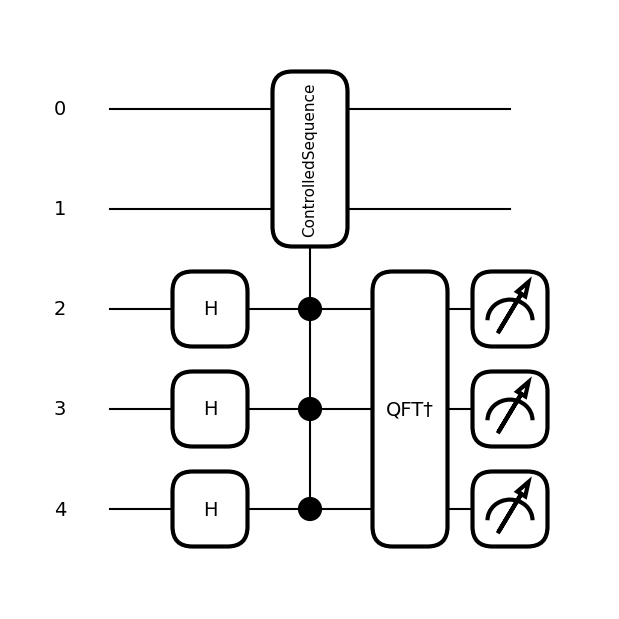

In [19]:
estimation_wires = range(2, 5)
fig, axs = qml.draw_mpl(circuit_qpe)(estimation_wires)

[1.36220018e-03 8.63590382e-03 1.92315116e-02 1.72388424e-03
 7.19056497e-04 9.67197648e-01 4.82434602e-04 6.47361296e-04]


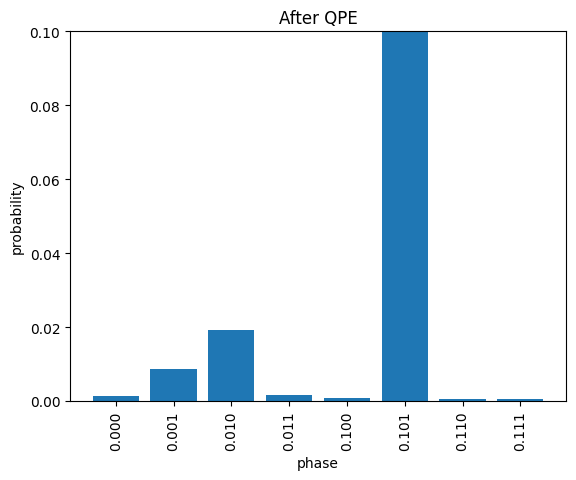

In [24]:
results = circuit_qpe(estimation_wires)
print(results)

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.ylim(0,0.1)
plt.title('After QPE')
plt.show()